In [1]:
#Importamos las librerias que necesitamos 
from math import * #importamos math para poder usar sqrt 
from random import * #Para usar números aleatorios 
import matplotlib.pyplot as plt #Para graficar 
from scipy.stats import norm #Para usar distribución normal 
import numpy as np #Para usar linspace

<font size=4 color='violet'>
    
## Elizabeth Rubio Juárez

## Tarea 1: Repaso de los conceptos básicos de Python
### Ciencia de datos para físicos: Facultad de ciencias, UNAM
#### Profesores: Karen Rubí Jiménez-López, Pedro Arturo Flores-Silva

**Instrucciones:** Este notebook contiene una serie de ejercicios que deben ser resueltos. Cada ejercicio se encuentra en una celda, ya sea de código o Markdown. Debes crear una o dos *celdas debajo de cada ejercicio* con tu(s) respectiva(s) respuestas. No modifiques las celdas originales.

Recuerda que para ejecutar el código de una celda, presionar `Ctlr + Enter` o bien el boton de `play` en el editor Jupyter notebook.

Cada ejercicio tendrá diferente valor, y se indicará en la celda de éste. La calificación final será la suma de los puntos obtenidos en cada ejercicio. Se calificará considerando la calidad de la respuesta, la claridad de la explicación y la correctitud del código. Por ejemplo, si el código no ejecuta la respuesta correcta pero se da una idea textual, se demuestra que hay comprensión del problema y el código hace sentido para el revisor, se otorgará una calificación parcial. Esto es, las respuestas no solo se evaluarán como bien o mal, sino que se considerará el esfuerzo.

El codigo que realices debes comentarlo donde creas necesario, no vale no hacer ningún comentario. Recuerda que los comentarios son importantes para que el código sea legible y entendible, éstos se agregan con el símbolo #. Para las funciones y/o clases que crees, agrega la documentación correspondiente (docstring), éste se agrega con `""" docstring """`.

### Ejercicio 1 (1 punto):
En una celda Markdown contesta: 
* ¿Qué es una palabra reservada en python? Enlista 5 ejemplos de nombres reservados en python y describe su función.
* Coloca tres ejemplos de nombres de variables que no son válidos en python. Explica por qué no son válidos.

<font size=3 color='blue'>
    
Las palabras reservadas son palabras que el lenguaje de programación ya ha reservado para realizar ciertas tareas como:
    
class. Permite realizar clases, las clases son como un constructor de objetos. 
    
False. El tipo booleano de Python tiene solo dos valores posibles (True y False). Nos dice si cierta condición no se cumple. 
  
def. Sirve para definir funciones. 
    
break. Permite terminar un ciclo y pasar al siguiente código después del ciclo. Es decir, se detiene hasta que una cierta condición deja de cumplirse. 
    
if. Se utiliza para ejecutar un bloque de código si, y solo si, se cumple una determinada condición.
    

    
<font size=3 color='orange'>
    
Tres ejemplos de nombres de variables que no son válidos en python son: 
    
fecha de nacimiento = "30 octubre 1999" (Dado que los nombres de variables no pueden incluir espacios en blanco).
    
lambda = 3 (Dado que las palabras reservadas del lenguaje están prohibidas como nombres de variables).
    
1var = 3 (Dado que los nombres de variables no pueden empezar con un número). 

    



### Ejercicio 2 (1 punto):

En una celda de código, escribe una función que encuentre las raíces de cualquier polinomio de segundo grado (implementar la chicharronera). En una celda markdown detalla posibles casos en la cual la función podría fallar.
Usa dicha función para encontrar las raíces del polinomio $f(x) = 10x^2 - 2x$ e imprimelas en pantalla.

<font size=3 color='blue'>
    
Buscamos resolver ecuaciones de segundo grado de la forma

\begin{equation}
 ax^{2} + bx+c=0
\end{equation}
    
Los datos del problema son los coeficientes $a$, $b$ y $c$. Queremos calcular los valores de $x$ que hacen cierta la ecuación. Dichos valores son:

\begin{equation} 
x_1=\frac{-b+\sqrt{b^{2}-4ac}}{2a} \qquad
x_2=\frac{-b-\sqrt{b^{2}-4ac}}{2a}
\end{equation}

Un problema es la división entre cero que tiene lugar cuando $a$ vale $0$. Cuando $a$ vale 0 la ecuación no es de segundo grado, sino de primer grado.

In [2]:
def Chicharronera(a, b, c): #Definimos la función teniendo en cuenta la forma de la función ax*2 + bx + x = 0 
    """ Función que encuentra las raíces de cualquier polinomio de segundo grado """
#Usamos el condicional if para los diferentes casos que tenemos
    if a == 0: #Si a = 0 entonces la función ahora es lineal 
        raise TypeError('No es una ecuación de segundo grado! Es lineal')
    
    d = b * b - 4 * a * c #Definimos el discriminante 
    dis = sqrt(abs(d)) #Definimos la raíz cuadrada del discriminante 
 
    if d > 0: #Esto sucede cuando el discriminante es un numero positivo
        print('Las raices son reales y diferentes entre si')
        print('La primera raíz es x1: ', (-b + dis)/(2 * a)) #Imprime las raices 
        print('La segunda raíz es x2: ', (-b - dis)/(2 * a))
        
    elif d == 0: #Esto sucede cuando el discriminante es igual a cero
        print('Las raices son reales e iguales')
        print('Las raices son: ', -b / (2*a)) #Imprime las raices 
        
    else:  #Esto es para el caso en el cual d<0, es decir, tenemos raices complejas
        print('Las raices son complejas')
        print('La primera raíz es x1: ', - b / (2*a), " + i", dis / (2 * a)) #Imprime las raices 
        print('La segunda raíz es x2: ', - b / (2*a), " - i", dis / (2 * a)) 

In [3]:
Chicharronera(10, -2, 0)

Las raices son reales y diferentes entre si
La primera raíz es x1:  0.2
La segunda raíz es x2:  0.0


### Ejercicio 3 (1 punto):

*Caida libre*: El gran Galileo Galilei subió la torre de Pisa para determinar el tiempo que tarda un objeto en caer desde una altura $H$ al suelo. Para ello, colocó un objeto de masa $m=100$ kg en la torre y lo dejó caer. El tiempo que tardó en caer fue $t=0.05616667$ minutos.

Considerando que la aceleración de la gravedad es $g=9.8$ $\frac{m}{s^2}$, escribe un programa que determine la altura de la torre de Pisa. El programa debe imprimir la altura en la pantalla.

Recuerda que el movimiento de caída libre simplificado cumple la ecuación: $y(t) = H + vt - \frac{1}{2}gt^2$.

<font size=3 color='blue'>
    
Dado que se menciona que Galileo Galilei colocó el objeto y lo "dejó caer", entonces la velocidad inicial será siempre igual a cero (v0 = 0). Entonces, 
    
\begin{equation}
 y(t) = H - \frac{1}{2}gt^2
\end{equation}

In [4]:
m = 100 #kg, no es necesario dado que no depende de la masa del objeto 
g = 9.8 #m/s^2
t = 3.3700002 #s

H = 0.5 * g * t * t #Definimos el valor de la altura
print('La altura de la torre de Pisa es de:', H, 'm')

La altura de la torre de Pisa es de: 55.648816605200196 m


### Ejercicio 4 (1 punto):
Crea una lista de números enteros del 0 al 99 : `lista = [0,1, 2, 3, 4, ... , 95, 96, 97, 98, 99]` (6 puntos menos si creas la lista manualmente).
 
Escribe un programa que imprima en la pantalla una la lista que cumpla con las siguientes condiciones:
* Los ultimos 10 elementos: debe imprimir lo siguiente `[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]`.
* Los primeros 11 elementos: debe imprimir lo siguiente `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`.
* La serie de elementos de la lista que están entre 60 y 75: debe imprimir lo siguiente `[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]`.
* El número 50: debe imprimir lo siguiente `50`.

Debes aplicar el concepto de *slicing* para resolver este ejercicio (notación de puntos `[:]`).

Puntos menos si se crean listas nuevas para cada caso y/o se seleccionan manualmente los valores.

In [5]:
lista = [*range(0, 100, 1)] # * sirve para que aparezcan los numeros 
print(lista)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [6]:
print(lista[-10:], lista[:11], lista[60:76], lista[50])

[90, 91, 92, 93, 94, 95, 96, 97, 98, 99] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75] 50


### Ejercicio 5 (1 punto):
Crea una lista de números enteros del 0 al 1000. A partir de dicha lista:
* Guarda en una variable una lista con los números pares usando ciclos y condicionales. Imprime los últimos 10 elementos de la lista final.
* Guarda en una variable una lista con los números impares usando listas comprensivas (comprehension list). Imprime los primeros 10 elementos de la lista final.

In [7]:
l2 = [*range(0, 1001, 1)] #* sirve para que aparezcan los numeros
par = [i for i in l2 if i%2==0] #Para que sea un número par 
print(par[-10:])

[982, 984, 986, 988, 990, 992, 994, 996, 998, 1000]


In [8]:
impar = [i for i in l2 if i%2!=0] #Para que sea un número impar
print(impar[:10])

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


### Ejercicio 6 (2 puntos): Aproximación de $\pi$
Una de las formas más sencillas de aproximar $\pi$ es mediante la siguiente serie infinita de Leibniz:
$$\frac{\pi}{4} = \sum_{n=0}^{\infty}\frac{(-1)^{n}}{(2n+1)} = \frac{1}{1} - \frac{1}{3} + \frac{1}{5}-\frac{1}{7}+\frac{1}{9}-...$$

crea una función para aproximar $\pi$ utilizando la serie de Leibniz. Usa n = 100000 e imprime el valor de tu aproximación tanto el valor de $\frac{\pi}{4}$ como $\pi$.

El valor de $\pi$ se obtiene al despejar:
$$\pi = 4 * \left(\sum_{n=0}^{\infty}\frac{(-1)^{n}}{(2n+1)} \right)$$

La siguiente celda de codigo ofrece el valor de $\frac{\pi}{4}$

In [9]:
#El valor de pi/4
print("El valor de pi/4 es aproximadamente {}".format(pi/4))

El valor de pi/4 es aproximadamente 0.7853981633974483


In [10]:
def picuartos(): 
    """Funcion creada para obtener el valor de pi y pi/4 mediante la serie infinita de Leibniz"""
    n = 100000 #Definimos el valor de n 
    sum = 0.0 #Iniciamos la suma 
    for i in range(n+1): #Dejamos correr el indice hasta n+1 para que cuente a n 
        sum += ((-1.0)**i)/((2.0*i)+1.0) #Definimos la serie infinita de Leibniz 
    return sum

In [11]:
print('Usando la serie infinita de Leibniz, el valor de pi/4 es:',picuartos())
print('Usando la serie infinita de Leibniz, el valor de pi es:',4*picuartos())

Usando la serie infinita de Leibniz, el valor de pi/4 es: 0.7854006633724301
Usando la serie infinita de Leibniz, el valor de pi es: 3.1416026534897203


### Ejercicio 7 (1 puntos): Identificador de vocales

Escribe una función que reciba una cadena, por ejemplo 'el pErro de la tiA chOnita' y regrese la cantidad de vocales que contiene. La función debe contener varios casos de prueba, if, elif y else. Con la cadena de ejemplo, imprime en pantalla el resultado de la función (10).

Para conocer si un caracter es una vocal, primero debes descomponer la cadena en caracteres individuales. Para ello observa el siguiente código:

In [12]:
# Divide una cadena en caracteres individuales
cadena_prueba = 'el pErro de la tiA chOnita'
caracteres_individuales = list(cadena_prueba)
print(caracteres_individuales)

['e', 'l', ' ', 'p', 'E', 'r', 'r', 'o', ' ', 'd', 'e', ' ', 'l', 'a', ' ', 't', 'i', 'A', ' ', 'c', 'h', 'O', 'n', 'i', 't', 'a']


In [13]:
def Vocales(cadena): #Definimos la función para encontrar las vocales, toma como argumento la cadena 
    """Función que cuenta vocales siempre y cuando no tenga acentos."""
    if type(cadena)!=str: #Con este condicional if se pide que sea una cadena de caracteres 
        raise TypeError('No es una cadena de caracteres!')
    else: #Ya se sabe que es una cadena
        v=['A','E','I','O','U','a','e','i','o','u'] #definimos las vocales en mayusculas y minusculas  
        l=list(cadena) #Hacemos lista la cadena de caracteres 
        s=0 #Definimos un contador de vocales y lo iniciamos en cero 
        for i in l: #Iteramos sobre cada elemento en la lista 
            for j in v: #Iteramos sobre las vocales 
                if j==i: #Si el elemento i de la lista coincide con el elemento j de las vocales entonces lo sumamos 
                    s+=1
        print('La cadena de caracteres tiene', s, 'vocales')    

In [14]:
Vocales('el pErro de la tiA chOnita')

La cadena de caracteres tiene 10 vocales


### Ejercicio 8 (2 puntos):

Escribe una clase "calculadora" que regrese el resultado de las operaciones de suma, resta, multiplicacion, division, modulo y potencia. La clase debe contener un método para cada operación.

Los métodos que pudiesen presentar errores como division entre cero, deben ser manejados de tal manera que el programa no imprima ningun error (vimos una clausula para hacer esto).

Adicional a esto, los métodos modulo y potencia deben ser generales, es decir, deben funcionar para cualquier número entero positivo (es un parámetro extra del método). Por ejemplo, la potencia de 2 elevado a 3 es 8, la potencia de 5 elevado a 3 es 125, etc.

Crea una instancia de la clase calculadora y prueba cada uno de los métodos, con valores de tu elección. Para los métodos que pudiesen presentar errores da dos ejemplos, uno totalmente funcional (3/5 por ejemplo) y otro que sea conflictivo pero que no regresa ningún error (4/0 por ejemplo).

In [15]:
"""Clase que funciona como una calculadora. 
Calcula las siguientes operaciones: suma, resta, multiplicación, división, modulo, potencia y raíz cuadrada."""
class calculadora(): #Definimos la clase "calculadora"

    def __init__(self, marca): #Sirve para iniciar los atributos del objeto (calculadora)

        self.marca = marca #Definimos la marca de la calculadora 

    def suma(self, a, b): #Definimos la suma de dos numeros a y b 

        return a + b #Regresa la suma de los numeros 
    
    def resta(self, a, b): #Definimos la resta de dos numeros a y b

        return a - b #Regresa la resta de los numeros 

    def multiplicacion(self, a, b): #Definimos la multiplicacion de dos numeros a y b

        return a*b #Regresa la multiplicación entre los numeros 
    
    def division(self, a, b): #Definimos la división de dos numeros a y b
    #Se tienen problema en la división por cero
        try:
            return a/b #Regresa la división y cuando se divide entre cero imprime la leyenda y regresa None
        except:
            print('ERROR! DIVISION ENTRE CERO')
            return None
        
    def modulo(self, a, b): #Definimos el modulo de dos numeros a y b
    #Se tiene problema en la división por cero
        try:
            return a%b #Regresa el residuo y cuando se divide entre cero imprime la leyenda y regresa None
        except:
            print('ERROR! DIVISION ENTRE CERO')
            return None
    
    def potencia(self, a, b): #Definimos la potencia del numero "a" a la potencia "b"
    #Se tiene problemas en potencias de la forma 0^(-n)
    #Funciona para decimales y se especifico error en 0^0
    #Se tiene problema al elevar numeros a raices pares
        
        if a==0 and b<0: #Imprime la leyenda de error cuando se eleva a una potencia negativa el 0 
            print('ERROR! HAY UNA INDETERMINACION')
        elif a==b==0: #Imprime la leyenda de error cuando se eleva 0 a la 0 
            print('ERROR! HAY UNA INDETERMINACION')
        else:
            return a**b #En otro caso, nos regresa el valor 
    
    def raizcuadrada(self, a): #Definimos la raíz cuadrada del numero a
        if a>=0: #Si el numero es mayor o igual que 0, regresa el valor real 
            return sqrt(a)
        else: #En el caso de ser menor que 0, regresa el valor complejo 
            return complex(0, sqrt(-a)) 

In [16]:
CASIO=calculadora('CASIO')
print('\n Marca')
print(CASIO.marca)

print('\n Suma')
print(CASIO.suma(100,400)) 

print('\n Resta')
print(CASIO.resta(5,2))

print('\n Multiplicación')
print(CASIO.multiplicacion(1,2))

print('\n División')
print(CASIO.division(50,2))
print(CASIO.division(100,0))

print('\n Modulo')
print(CASIO.modulo(1,2))
print(CASIO.modulo(200,0))

print('\n Potencia')
print(CASIO.potencia(0,2))
print(CASIO.potencia(3,-2))
print(CASIO.potencia(-5,5))
print(CASIO.potencia(2,0.5))
print(CASIO.potencia(-5,2))
print(CASIO.potencia(0,-3))
print(CASIO.potencia(0,0))

print('\n Raíz Cuadrada')
print(CASIO.raizcuadrada(9))
print(CASIO.raizcuadrada(-9))


 Marca
CASIO

 Suma
500

 Resta
3

 Multiplicación
2

 División
25.0
ERROR! DIVISION ENTRE CERO
None

 Modulo
1
ERROR! DIVISION ENTRE CERO
None

 Potencia
0
0.1111111111111111
-3125
1.4142135623730951
25
ERROR! HAY UNA INDETERMINACION
None
ERROR! HAY UNA INDETERMINACION
None

 Raíz Cuadrada
3.0
3j


### Ejercicio de puntos extras opcional (1 punto):

Supóngamos que tenemos una lista de números enteros y queremos encontrar el número más grande. Por ejemplo, si la lista es `[1, 2, 3, 4, 5]` el número más grande es 5. Crea una función que encuentre el número más grande en una lista de números. La función debe regresar el número más grande y el índice en el que se encuentra. Prueba la función con una lista de números de tu elección.

In [17]:
def maximum(l4): 
    """Función que da el número más grande de una lista. 
    Es importante mencionar que si en la lista hay dos numeros iguales, 
    dará la posición del segundo elemento."""
    m = l4[0] #Primer valor de la lista
    c = 0 #Definimos un contador 
    for i in range(len(l4)): #Iteramos sobre los elementos de la lista 
        if l4[i] >= m: #Debe cumplirse la condición de que sea mayor o igual que el primer elemento de la lista
            #Cuando el numero sea igual que el primer elemento de la lista, imprimira la posición del numero
            c = i #Regresa la posición del elemento 
            m = l4[i] #Regresa el valor del elemento en esa posición 
    print('El número más grande de la lista es', m, 'y esta en la posición', c)

In [18]:
maximum([15,1,10, 15])

El número más grande de la lista es 15 y esta en la posición 3


### Ejercicio de puntos extras opcional (3 puntos):

Supóngamos que tenemos un dado convencional de 6 caras. Crea una función que simule el lanzamiento de un dado. La función debe regresar un número aleatorio entre 1 y 6.

Sabemos que la probabilidad de que salga un número es de $\frac{1}{6}$, es decir, la probabilidad de que salga un 1 es de $\frac{1}{6}$, la probabilidad de que salga un 2 es de $\frac{1}{6}$, etc.

* Prueba la función con 6 lanzamientos, en una celda markdown explica porqué el resultado es dificilmente [1, 2, 3, 4, 5, 6].

* Prueba la función con 1000 lanzamientos, crea una grafica de barras de los resultados (investiga como puedes graficar los resultados en una grafica de barras) y explica a que distribucion se parece y porqué es así.

Hint: Para crear los números aleatorios, puedes usar la función `random.randint()`. O bien, usar el modulo numpy para crearlos. Para graficar los resultados, puedes usar la libreria matplotlib, seaborn, plotly o cualquiera que se te haga más fácil.

In [19]:
def Dado(): 
    """Función que simula un dado, por lo que regresa un número aleatorio entre 1 y 6. """
    ca = randint(1,6) #Creamos los números aleatorios
    return ca #Regresamos el número aleatorio 

In [20]:
ll = [] #Creamos una lista vacia
f = 6
for i in range(f): #Generamos los 6 números aleatorios  
    n = Dado() #Usamos la función antes definida
    ll.append(n) #Llenamos la lista con los números aleatorios
print('Al lanzar el dado 6 veces, se obtuvo lo siguiente en cada caso:', ll)

Al lanzar el dado 6 veces, se obtuvo lo siguiente en cada caso: [6, 5, 1, 5, 3, 5]


<font size=3 color='blue'>

El resultado dificilmente será [1,2,3,4,5,6] pues los números aleatorios no se pueden reproducir en la computadora. Más bien, son números pseudo-aleatorios. 
    
Un número pseudo-aleatorio es un número generado en un proceso que parece producir números al azar, pero no lo hace realmente. Las secuencias de números pseudo-aleatorios no muestran ningún patrón o regularidad aparente desde un punto de vista estadístico, a pesar de haber sido generadas por un algoritmo completamente determinista, en el que las mismas condiciones iniciales producen siempre el mismo resultado. La condición inicial se llama semilla (seed).
    
    
Es importante mencionar que cada tirada es una variable independiente de las anteriores o posteriores, por lo que pueden obtenerse el mismo valor n veces. 

In [21]:
#Para los 1000 lanzamientos, repetimos el procedimiento anterior 
ll1 = [] #Creamos una lista vacia
g = 1000
for i in range(g): #Generamos los 1000 números aleatorios  
    nn = Dado() #Usamos la función antes definida
    ll1.append(nn) #Llenamos la lista con los números aleatorios

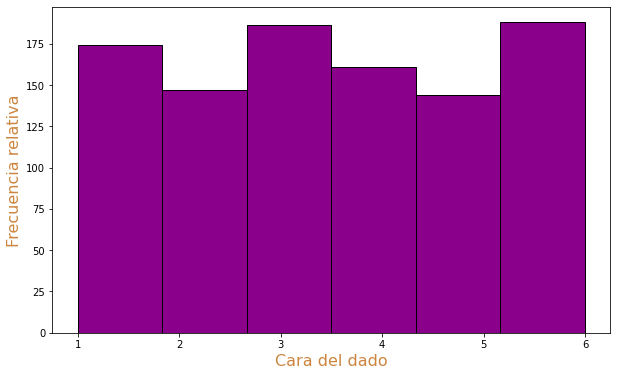

In [22]:
#Vamos a graficar
plt.figure(figsize=(10,6)) #Definimos el tamaño de la gráfica 
plt.hist(ll1, bins=6, color='darkmagenta', edgecolor='black') #Definimos las barras que queremos
plt.xlabel("Cara del dado", size = 16, color='peru') #Nombrasmos el eje x
plt.ylabel("Frecuencia relativa", size = 16, color='peru') #Nombramos el eje y
plt.show() #Enseña el histograma 

<font size=3 color='blue'>
    
Al tener un dado de 6 caras, entonces la probabilidad de sacar cualquiera de los números es 1/6 (se tiene la misma probabilidad de sacar cualquier número que de sacar los otros cinco). 

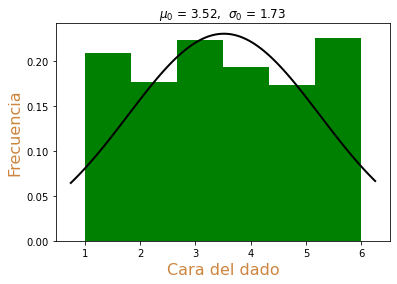

In [23]:
mu, std = norm.fit(ll1) #Ajustamos una distribución normal a los datos
plt.hist(ll1, bins=6, density=True, color='g') #Histograma

xmin, xmax = plt.xlim() #Limites del eje x 
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2) #Ajuste
title = "$\mu_0$ = %.2f,  $\sigma_0$ = %.2f" % (mu, std)
plt.xlabel("Cara del dado", size = 16, color='peru') #Nombrasmos el eje x
plt.ylabel("Frecuencia", size = 16, color='peru') #Nombramos el eje y

plt.title(title) #Titulo de la gráfica 

plt.show() #Muestra la gráfica

<font size=3 color='blue'>
    
No es notorio que sigue una distribución normal, sin embargo, a medida que aumenta el tamaño de la muestra, la distribución de las medias muestrales se acerca a una normal.